# PROJEKTNA NALOGA IZ ANALIZE PODATKOV IGRE LEAGUE OF LEGENDS

## UVOD

[League of Legends](https://www.leagueoflegends.com/en-gb/) je priljubljena videoigra podjetja Riot Games, ki je izšla že leta 2009. Od takrat je močno zrasla v popularnosti, danes jo namreč igra okoli 150 milijonov igralcev. Podatke za analizo te igre sem vzel iz spletne strani [u.gg](https://u.gg/).

Osnovni način igre, ki sem ga izbral za analizo podatkov, se imenuje *Summoner's Rift*. V tem načinu se spopadeta dve ekipi, vsaka po 5 igralcev. Vsak igralec mora izmed 168 likov (*champion-ov*) izbrati svojega. Vsak igralec ekipe dobi tudi svojo [vlogo](https://www.pinnacle.com/en/esports-hub/betting-articles/league-of-legends/the-different-league-of-legends-roles-explained/atz2jajnpca9ppgg) (*role*), to so: top, jungle, mid, bot in support. Ekipa mora s pomočjo vseh igralcev in strategije uničiti nasprotnikovo bazo, da zmaga igro. Igralci so rangirani v 15 nivojev glede na to, kako dobro igrajo. Kjer ni posebej specificirano sem analiziral podatke iz vseh nivojev skupaj.

## ANALIZA PODATKOV

Za analizo podatkov bomo potrebovali nekaj knjižnic, ki jih najprej uvozimo. Prav tako si v datoteki s pomožnimi funkcijami pripravimo spremenljivke za pomembne podatke, ki nas zanimajo.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pomozne_funkcije import *

### SPLOŠNI PODATKI

Za uživalca te priljubljene igre je najbolj zanimiv podatek, kateri championi najpogosteje zmagujejo (*win rate*), da se lahko odločijo koga igrati.

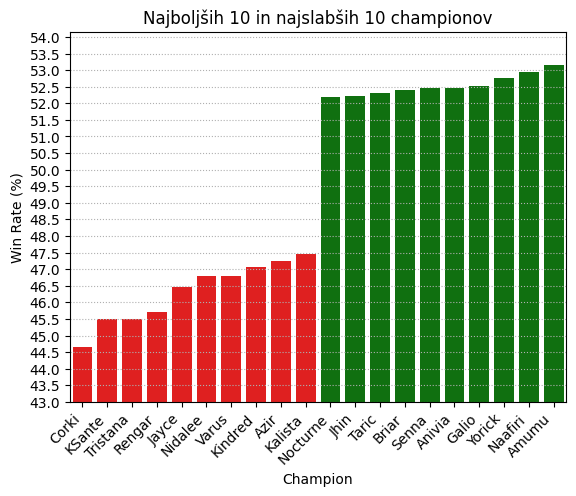

In [22]:
izbrani_wr = izbrani_champs(10, 'Win Rate (%)')
sns.barplot(x='Champion', y='Win Rate (%)', hue = 'Champion', data=izbrani_wr, palette=['red']*10 + ['green']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(int(izbrani_wr['Win Rate (%)'].min()) - 1, izbrani_wr['Win Rate (%)'].max() + 1)
plt.yticks(np.arange(int(izbrani_wr['Win Rate (%)'].min()) - 1, izbrani_wr['Win Rate (%)'].max() + 1, 0.5))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('Najboljših 10 in najslabših 10 championov')
plt.show()

Ob izbiri igranja nas zanima tudi, če bomo tega championa sploh lahko igrali. Poglejmo si, kateri championi so najpogosteje prepovedani (*ban rate*) in kateri so najpogosteje izbrani (*pick rate*). Te bomo verjetno lahko igrali bolj redko, saj jih bo že izbral kdo drug ali pa bodo prepovedani.

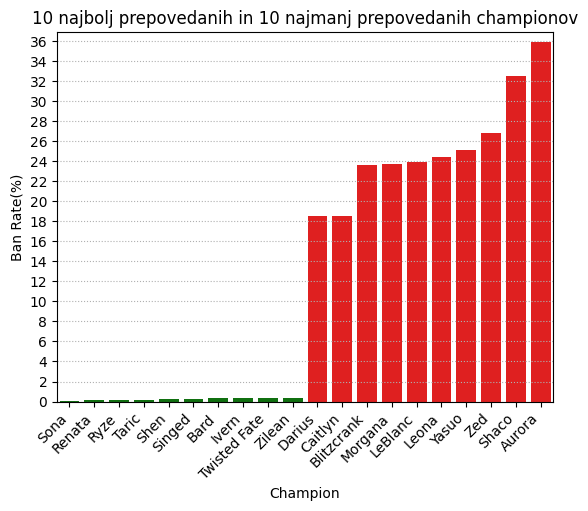

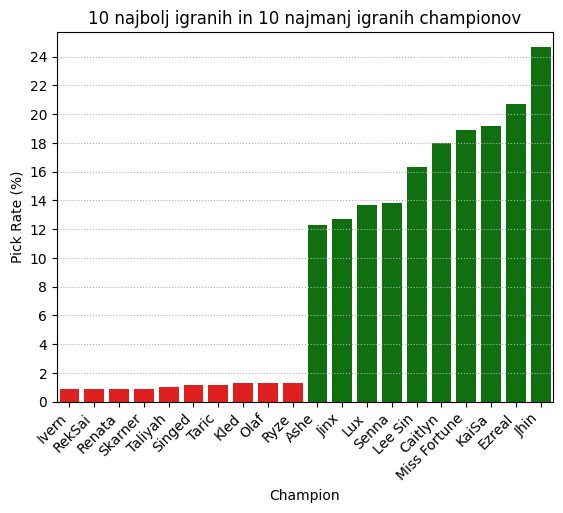

In [26]:
izbrani_br = izbrani_champs(10, 'Ban Rate(%)')
sns.barplot(x='Champion', y='Ban Rate(%)', hue = 'Champion', data=izbrani_br, palette=['green']*10 + ['red']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, izbrani_br['Ban Rate(%)'].max() + 1)
plt.yticks(np.arange(0, izbrani_br['Ban Rate(%)'].max() + 1, 2))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('10 najbolj prepovedanih in 10 najmanj prepovedanih championov')
plt.show()

izbrani_pr = izbrani_champs(10, 'Pick Rate (%)')
sns.barplot(x='Champion', y='Pick Rate (%)', hue = 'Champion', data=izbrani_pr, palette=['red']*10 + ['green']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, izbrani_pr['Pick Rate (%)'].max() + 1)
plt.yticks(np.arange(0, izbrani_pr['Pick Rate (%)'].max() + 1, 2))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('10 najbolj igranih in 10 najmanj igranih championov')
plt.show()

Opazimo, da je Aurora najbolj pogosto prepovedan champion. Ta podatek nam je logičen, sa je izšla 17. julija 2024 in ljudje še ne znajo igrati proti njej. Poleg nje ljudje očitno močno ne marajo tudi Shacota, ki je znan kot nadležen. Na seznamu bolj prepovedanih pa sta tudi Caitlyn in Leona, ki sta zelo močna championa. S poznavanjem igre je jasno, da je količina prepovedi odvisna od tega kako nadležen je champion in kako močan je. 

Glede količine igranja championov opazimo, da jih veliko pripada vlogi *bottom*. Kasneje si bomo še bolj natančno ogledali, če sta ta dva podatka v korelaciji, za sedaj pa se zadovoljimo zgolj s temi podatki, ki zavzetemu igralcu potešijo radovednost.

### ODVISNOSTI RAZLIČNIH PODATKOV

Že pri prejšnjih grafih smo začeli opazovati, kateri podatki so odvisni en od drugega. Sedaj si te odvisnosti poglejmo še bolj natančno.

Najprej si oglejmo, če je to, kako pogosto je champion izbran odvisno od tega kako pogosto zmaga. 

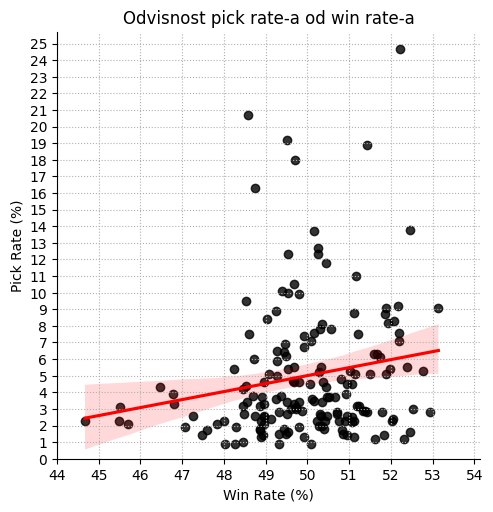

In [40]:
vsi_championi = pd.read_csv(f'../podatki/csv/overall.csv')
sns.lmplot(x='Win Rate (%)', y='Pick Rate (%)', data=vsi_championi, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1)
plt.xticks(np.arange(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1, 1))
plt.ylim(0, izbrani_pr['Pick Rate (%)'].max() + 1)
plt.yticks(np.arange(0, izbrani_pr['Pick Rate (%)'].max() + 1, 1))
plt.grid(True, linestyle='dotted')
plt.title('Odvisnost pick rate-a od win rate-a')
plt.show()

Opazimo majhno korelacijo. Očitno ima možnost championa da zmaga manjši vpliv na to, kako pogosto je izbran, a so v igri še drugi dejavniki. Na to kako pogosto champion zmaga morda vpliva tudi količina prepovedi, ki nam pove tudi kako močan je champion v očeh igralcev.  

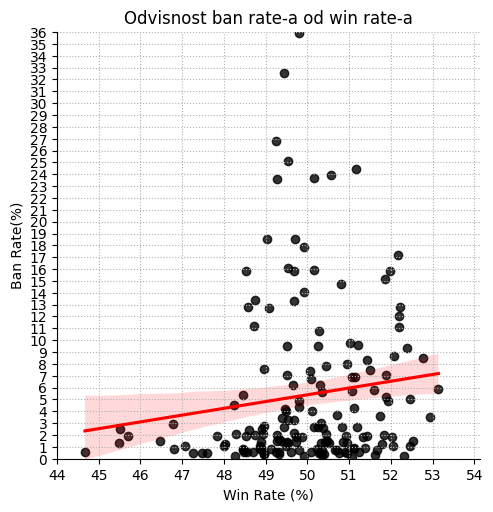

In [41]:
sns.lmplot(x='Win Rate (%)', y='Ban Rate(%)', data=vsi_championi, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1)
plt.xticks(np.arange(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1, 1))
plt.ylim(0, izbrani_pr['Ban Rate(%)'].max() + 1)
plt.yticks(np.arange(0, vsi_championi['Ban Rate(%)'].max() + 1, 1))
plt.grid(True, linestyle='dotted')
plt.title('Odvisnost ban rate-a od win rate-a')
plt.show()

Očitno korelacija obstaja. Bolj močno pa je razvidno, da so najpogosteje prepovedani championi z win rate-om večjim od 49 %. Kaj pa, če je pogosteje prepovedan champion, ki je sicer pogosto izbran. Poglejmo si še to odvisnost.

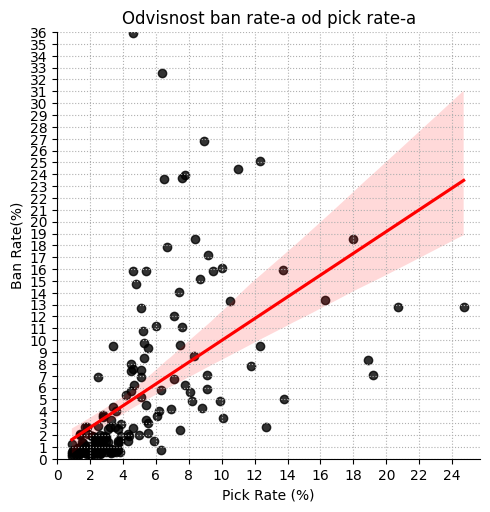

In [43]:
sns.lmplot(x='Pick Rate (%)', y='Ban Rate(%)', data=vsi_championi, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(int(vsi_championi['Pick Rate (%)'].min()), vsi_championi['Pick Rate (%)'].max() + 1)
plt.xticks(np.arange(int(vsi_championi['Pick Rate (%)'].min()), vsi_championi['Pick Rate (%)'].max() + 1, 2))
plt.ylim(0, izbrani_pr['Ban Rate(%)'].max() + 1)
plt.yticks(np.arange(0, vsi_championi['Ban Rate(%)'].max() + 1, 1))
plt.grid(True, linestyle='dotted')
plt.title('Odvisnost ban rate-a od pick rate-a')
plt.show()

Naklon korelacijske premice je tu kar velik, torej je očitno ban rate močno odvisen od pick rate-a. Verjetno se igralci naveličajo igrati proti istim championom, ali pa prepovedo tistega, ki jih je ravno premagal prejšnjo igro in odvisnost pride iz tega.

### ANALIZA VLOG

Championov v igri je kar 168, niso pa enakomerno porazdeljenih po različnih role-ih. Oglejmo si, championov katerega role-a je največ. 

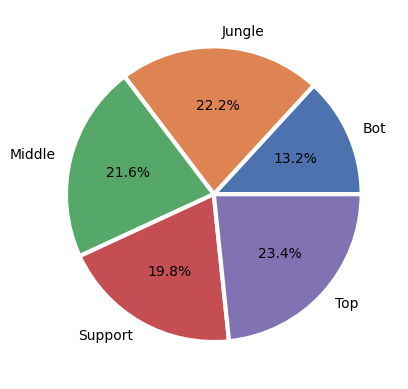

In [87]:
podatki_role = vsi_championi.groupby('Role').size()
plt.pie(podatki_role, labels = podatki_role.index, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, colors = sns.color_palette('deep'))
plt.show()


Vidimo, da so razlike med različnimi role-i kar opazne, championov s topa-a je kar 10% več kot iz spodnje strani rifta! Očitno ima podjetje Riot Games preferenco za top, res pa ne mara celotne spodnje strani rifta (support in bot sta namreč oba na spodnjem delu). Poglejmo si še kakšno je mnenje igralcev - ali je kakšen role veliko bolj prepovedan kot drugi.

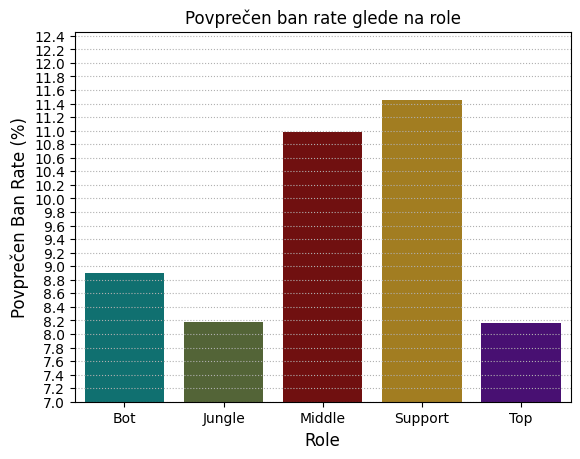

In [117]:
dobri_podatki = vsi_championi[vsi_championi['Ban Rate(%)'] > 2]
podatki_roleb = dobri_podatki.groupby('Role')['Ban Rate(%)'].mean().reset_index()

sns.barplot(x='Role', y='Ban Rate(%)', hue = 'Role', data=podatki_roleb, palette=['teal', 'darkolivegreen', 'maroon', 'darkgoldenrod', 'indigo'])
plt.title('Povprečen ban rate glede na role')
plt.xlabel('Role', size = 12)
plt.ylabel('Povprečen Ban Rate (%)', size = 12)
plt.ylim(podatki_roleb['Ban Rate(%)'].min() - 1, podatki_roleb['Ban Rate(%)'].max() + 1)
plt.yticks(np.arange(int(podatki_roleb['Ban Rate(%)'].min()) - 1, podatki_roleb['Ban Rate(%)'].max() + 1, 0.2))
plt.grid(True, axis = 'y', linestyle = 'dotted')
plt.show()

Opazimo, da je support najbolj prepovedan, top in jungle pa najmanj. Sklepamo lahko, da do tega pride, ker imajo support in middle največ vpliva na celoten rift in jih posledično prepovedo tudi igralci iz drugih role-ov (za top velja nasprotno). Precej presenetljiv je podatek za jungle, saj je prav tako prisoten povsod, a očitno ni tako nadležen, da bi ga ostali prepovedali.

### BOLJ ZANIMIVA META-ANALIZA